In [ ]:
from google.colab import files
import pandas as pd

#
uploaded = files.upload()


Saving Dataset_imprese_kaagle.xlsx to Dataset_imprese_kaagle.xlsx


In [ ]:
df = pd.read_excel("Dataset_imprese_kaagle.xlsx")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


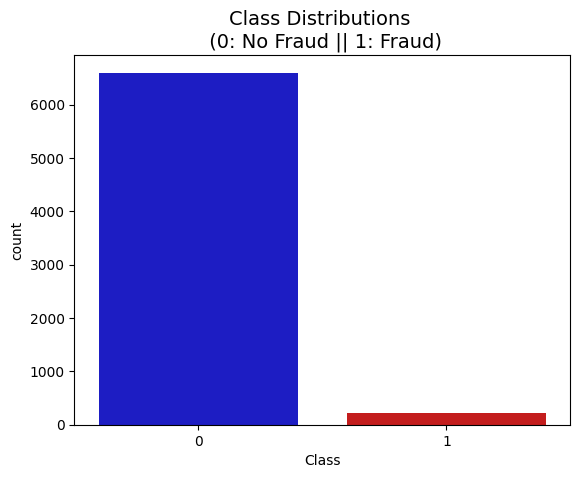

No Frauds 96.77 % of the dataset
Frauds 3.23 % of the dataset
Logistic Regression

[INFO] Logistic Regression - Best Params with RandomSearch: {'penalty': 'l2', 'C': 0.01}

=== Logistic Regression: Classification Report Training (5 fold) ===
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      5279
           1       0.06      0.39      0.10       176

    accuracy                           0.77      5455
   macro avg       0.52      0.59      0.48      5455
weighted avg       0.95      0.77      0.84      5455


=== Logistic Regression - CLASSIFICATION REPORT (TEST SET) ===
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1320
           1       0.05      0.36      0.09        44

    accuracy                           0.76      1364
   macro avg       0.51      0.57      0.47      1364
weighted avg       0.94      0.76      0.84      1364

Confusion Matrix (test):
[[1019  301]
 [

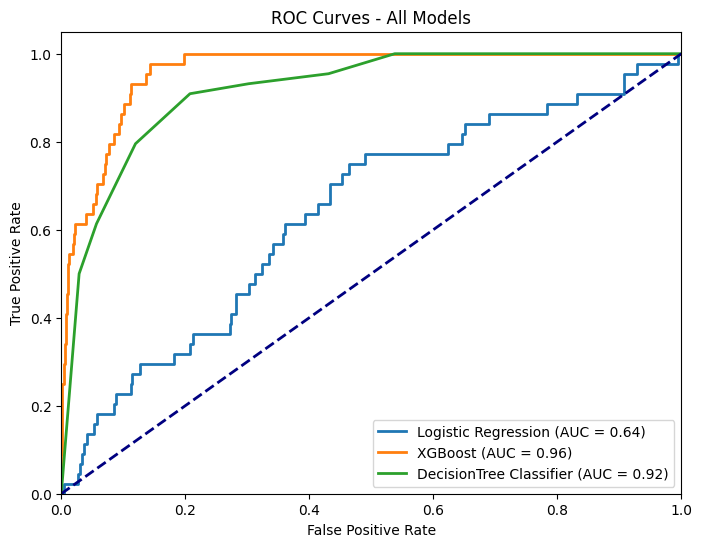

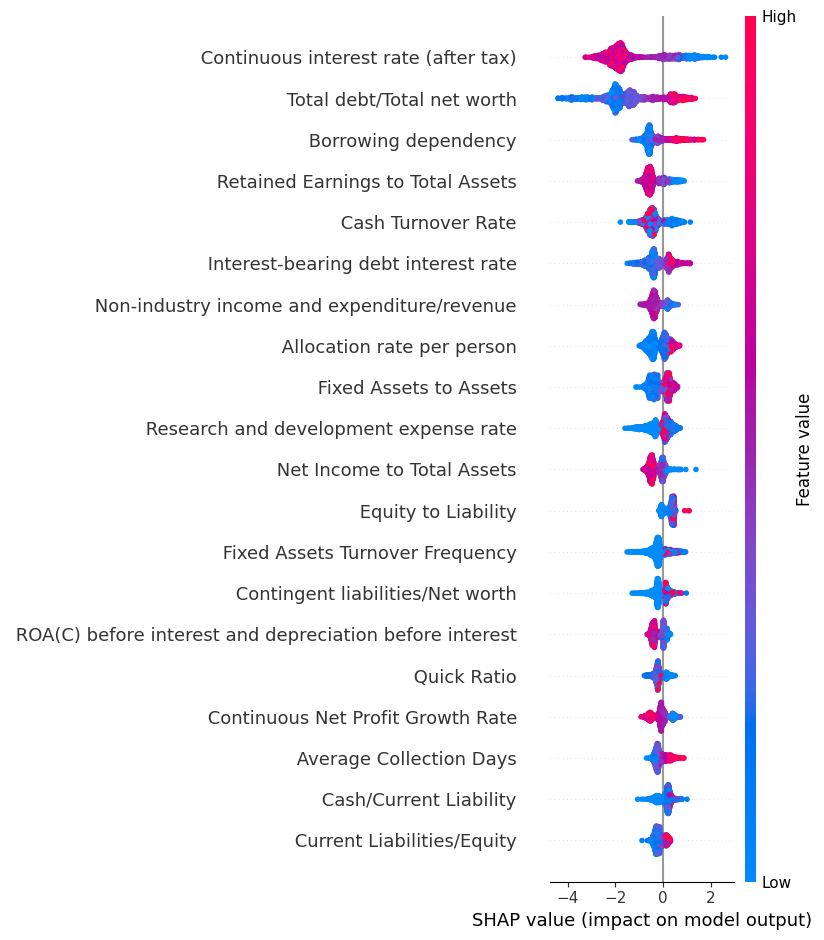

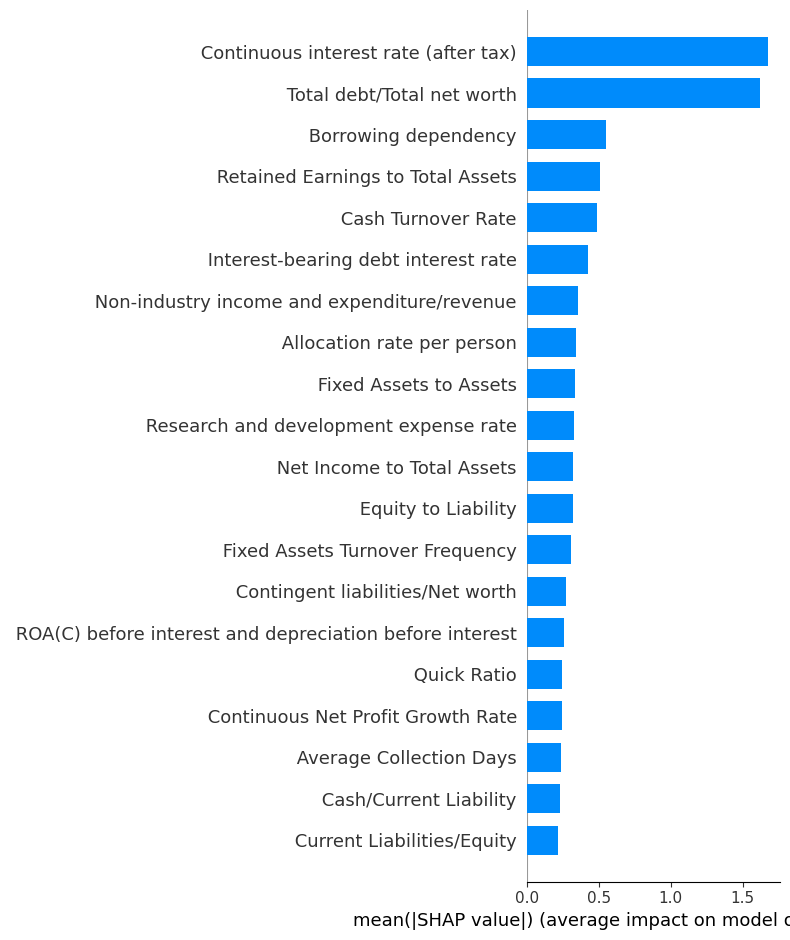

In [ ]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from xgboost import XGBClassifier
import shap

# Load the data

#df = pd.read_excel('datasetpath\\Dataset_imprese_kaagle.xlsx'
df["Class"] = df["Bankrupt?"]
df = df.drop('Bankrupt?', axis=1)  # ← IMPORTANT: remove the old colums!

# Define
X = df.drop('Class', axis=1)
y = df['Class']

#EDA ON CLASS VARIABLE


colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

df.head()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

#MODELS

def train_model_cv_holdout_with_train_report(params, Model, X_train, X_test, y_train, y_test, model_name):
     """
    1) Run RandomizedSearchCV on the entire X_train to find the best hyperparameters.
    2) Using best_params, perform a "manual" cross-validation (K=5) on X_train,
       collect predictions, and print a SINGLE aggregated classification_report on training.
    3) Train the final model (with best_params) on the FULL X_train.
    4) Evaluate on X_test and print the classification_report for the test set.
    5) Return a dictionary with the final metrics (test set).
"""
     from imblearn.pipeline import make_pipeline
     from imblearn.over_sampling import SMOTE
     from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
     from sklearn.metrics import (
        classification_report, confusion_matrix,
        accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    )

    # A) FIND best_params with RandomizedSearchCV (CV on X_train)
     inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

     rand_search = RandomizedSearchCV(
        estimator=Model,
        param_distributions=params,
        n_iter=4,
        scoring='f1',
        cv=inner_cv,
        n_jobs=-1,
        random_state=42
    )

    # Pipeline "temporary" for the parameters research
     pipeline_search = make_pipeline(
        SMOTE(sampling_strategy='minority', random_state=42),
         rand_search
    )

    # Fit TRAIN (80%)
     pipeline_search.fit(X_train, y_train)

    # Best params found
     best_params = rand_search.best_params_
     print(f"\n[INFO] {model_name} - Best Params with RandomSearch:", best_params)

    # B) Cross-validation (5 fold) on training set
     outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

     all_train_true = []
     all_train_pred = []

    # Model "final" best_params
     best_model = Model.set_params(**best_params)
    # build also a pipeline SMOTE + best_model
     pipeline_final_train = make_pipeline(
        SMOTE(sampling_strategy='minority', random_state=42),
        best_model
    )

     for train_idx, val_idx in outer_cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Train on (X_tr, y_tr)
        pipeline_final_train.fit(X_tr, y_tr)

        # Forecast on (X_val, y_val)
        y_val_pred = pipeline_final_train.predict(X_val)

        # Aggregate report
        all_train_true.extend(y_val)
        all_train_pred.extend(y_val_pred)

     print(f"\n=== {model_name}: Classification Report Training (5 fold) ===")
     print(classification_report(all_train_true, all_train_pred))

    # C) Train on all training set
     pipeline_final_train.fit(X_train, y_train)

    # D) Final valutation test set (20%)
     y_pred_test = pipeline_final_train.predict(X_test)
     y_pred_proba = pipeline_final_train.predict_proba(X_test)[:, 1]

     print(f"\n=== {model_name} - CLASSIFICATION REPORT (TEST SET) ===")
     print(classification_report(y_test, y_pred_test))

    # Confusion matrix test set
     print("Confusion Matrix (test):")
     print(confusion_matrix(y_test, y_pred_test))

    # Metrics on test
     acc = accuracy_score(y_test, y_pred_test)
     prec = precision_score(y_test, y_pred_test, average='macro')
     rec = recall_score(y_test, y_pred_test, average='macro')
     f1 = f1_score(y_test, y_pred_test, average='macro')
     auc = roc_auc_score(y_test, y_pred_test)

     return {
        'Algorithm': model_name,
        'Model Score': f"{round(acc * 100, 2)}%",
        'Precision': round(prec, 2),
        'Recall': round(rec, 2),
        'F1 score': round(f1, 2),
        'ROC-AUC score': round(auc, 2),
        'y_test': y_test,
        'y_pred_proba': y_pred_proba,
        'model': pipeline_final_train
    }, best_params

#############################################
# 3) Separate train–test (80–20)
#############################################
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y    # Mantain proportation among classes
)



#############################################
# 4) Create DataFrame for results
#############################################
Models = pd.DataFrame(columns=['Algorithm', 'Model Score', 'Precision', 'Recall', 'F1 score', 'ROC-AUC score'])


#############################################
# 5) Train and evaluate all models
#############################################

# 5.1) K-Nearest Neighbors
#print("K Nearest Neighbour")
#knn_params = {
    #"n_neighbors": list(range(2, 5, 1)),
    #"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
#}
#knn_result, knn_best_params = train_model_cv_holdout_with_train_report(knn_params, KNeighborsClassifier(),
                                    #X_train, X_test, y_train, y_test,
                                    #)
#Models = pd.concat([Models, pd.DataFrame([knn_result])], ignore_index=True)

# 5.2) Logistic Regression
print("Logistic Regression")
lr_params = {
    "penalty": ['l2'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
lr_result, lr_best_params = train_model_cv_holdout_with_train_report(lr_params, LogisticRegression(solver='liblinear'),
                                   X_train, X_test, y_train, y_test,
                                   "Logistic Regression")
Models = pd.concat([Models, pd.DataFrame([lr_result])], ignore_index=True)

# 5.3) XGBoost
print("XGBoost")
xgb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}
xgb_result, xgb_best_params = train_model_cv_holdout_with_train_report(
    xgb_params,
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    X_train, X_test, y_train, y_test,
    "XGBoost"
)
Models = pd.concat([Models, pd.DataFrame([xgb_result])], ignore_index=True)

# 5.4) Decision Tree
print("DecisionTree Classifier")
dt_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2, 4, 1)),
    "min_samples_leaf": list(range(5, 7, 1))
}
dt_result,dt_best_params = train_model_cv_holdout_with_train_report(dt_params, DecisionTreeClassifier(),
                                   X_train, X_test, y_train, y_test,
                                   "DecisionTree Classifier")
Models = pd.concat([Models, pd.DataFrame([dt_result])], ignore_index=True)


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for i, row in Models.iterrows():
    # Retrive the pred proba from dict saved before
    model_name = row['Algorithm']
    y_test = row['y_test']
    y_pred_proba = row['y_pred_proba']

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend(loc="lower right")
plt.show()



# Retrieve pipeline of the XGBoost from DataFrame Models
xgb_pipeline = Models.loc[Models['Algorithm']=="XGBoost", 'model'].values[0]

# Take the clf
xgb_clf = xgb_pipeline.steps[-1][1]

# build explainer SHAP
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

# Plot 1: scatter with effect and direction of the featues
shap.summary_plot(shap_values, X_test)

# Plot 2: bar plot importance feature
shap.summary_plot(shap_values, X_test, plot_type="bar")